# Tech Store Sales

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.axis import Axis

### Unire i dati di vendita al mese in un unico file:

In [3]:
df1 = pd.read_csv('/Users/domenicocangemi/Desktop/Data/Python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('/Users/domenicocangemi/Desktop/Data/Python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]      

In [4]:
all_months = pd.DataFrame()
for file in files:
    temp_df = pd.read_csv('/Users/domenicocangemi/Desktop/Data/Python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    all_months = pd.concat([all_months, temp_df])

all_months.to_csv("All_data.csv", index = False)

In [5]:
all_data = pd.read_csv('/Users/domenicocangemi/Desktop/Data/Python/All_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Pulizia dei dati

In [6]:
all_data = all_data.dropna(how='all')

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Domanda 1: Qual è stato il mese migliore per le vendite? Qual è stata l'entrata?

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [10]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [11]:
month_sales = all_data.groupby('Month', as_index=False)[['Sales', 'Quantity Ordered']].sum()

In [12]:
month_sales.sort_values('Sales', ascending=False)

,Month,Sales,Quantity Ordered
11,12,4613443.34,28114
9,10,3736726.88,22703
3,4,3390670.24,20558
10,11,3199603.20,19798
4,5,3152606.75,18667
2,3,2807100.38,17005
6,7,2647775.76,16072
5,6,2577802.26,15253
7,8,2244467.88,13448
1,2,2202022.42,13449


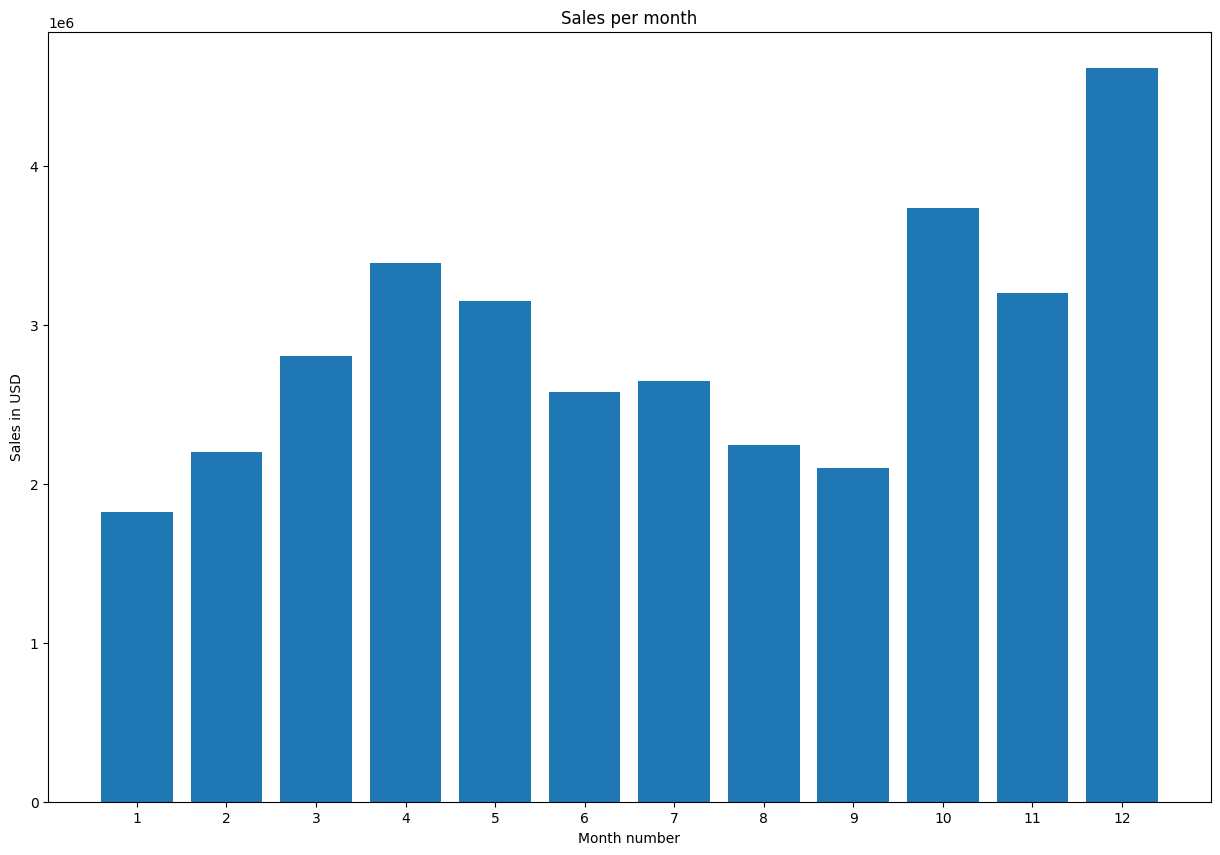

In [13]:
plt.figure(figsize=(15,10))
plt.xticks(month_sales['Month'])
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.bar(month_sales['Month'],month_sales['Sales'])
plt.title("Sales per month")
plt.show()

### Domanda 2: In che città si è verificato il numero maggiore di vendite?

In [14]:
all_data['City'] = all_data['Purchase Address'].str.split(',', expand=True)[1]
all_data['City'] = all_data['City'].str.strip()

In [15]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [16]:
city_sales = all_data.groupby('City', as_index=False)['Sales'].sum()
city_sales

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


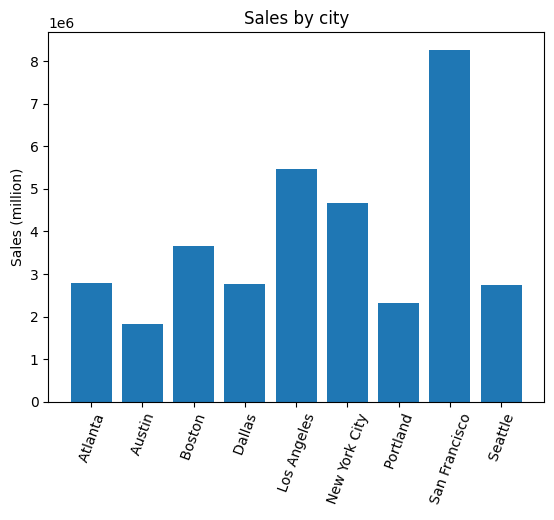

In [17]:
plt.bar(city_sales['City'], city_sales['Sales'])
plt.ylabel('Sales (million)')
plt.xticks(rotation=70)
plt.title("Sales by city")
plt.show()

### Domanda 3: In quali fasce orarie conviene aumentare il marketing per massimizzare le probabilità di acquisto?

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [19]:
all_data['Order Hour'] = all_data['Order Date'].apply(lambda x: x[9:11])
all_data['Order Hour'] = pd.to_numeric(all_data['Order Hour'])

In [20]:
hour_sales = all_data.groupby('Order Hour', as_index=False)['Sales'].sum()

In [21]:
hour_sales['Order Hour'] = hour_sales['Order Hour'].apply(lambda x: f"{x}-{x+1}")

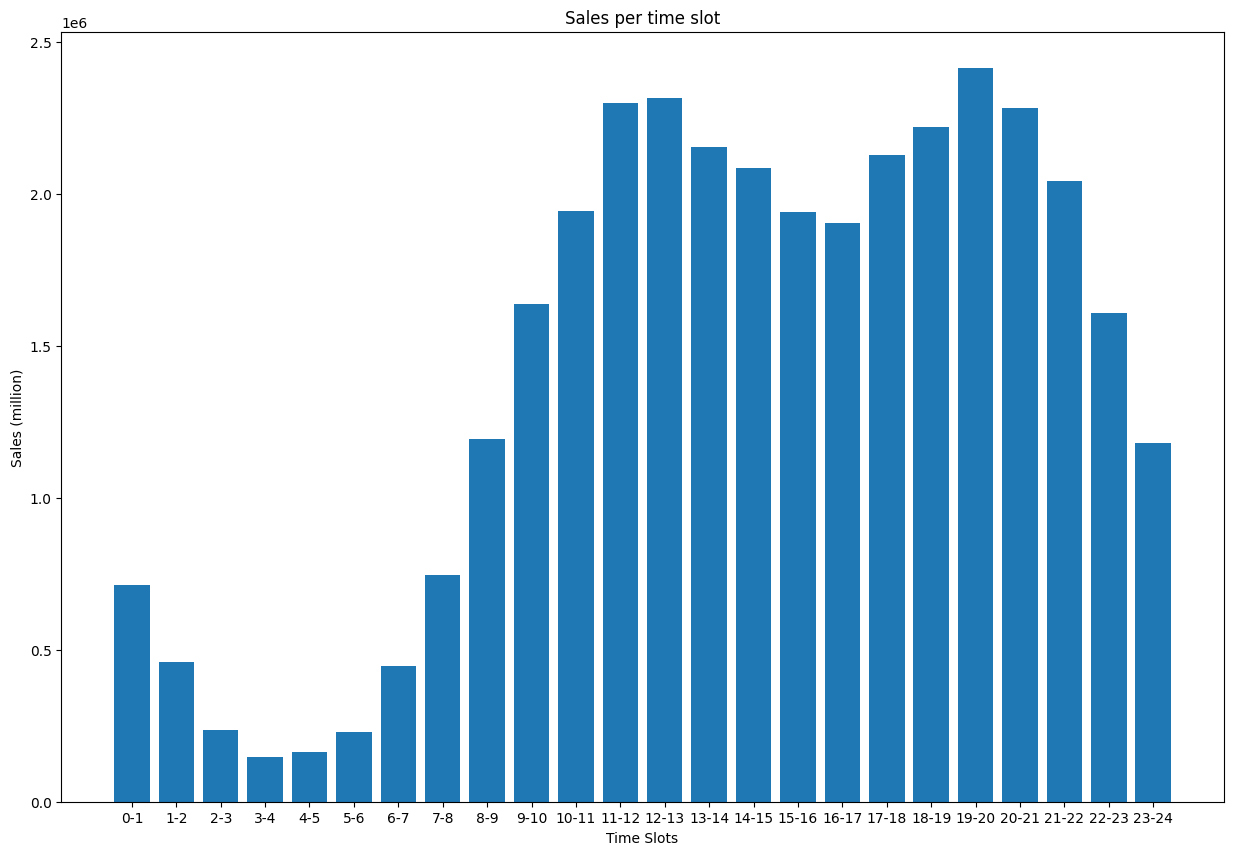

In [22]:
plt.figure(figsize=(15,10))
plt.bar(hour_sales['Order Hour'], hour_sales['Sales'])
plt.xlabel('Time Slots')
plt.ylabel('Sales (million)')
plt.title("Sales per time slot")
plt.show()

### Domanda 4: Quali prodotti vengono più frequentemente venduti insieme?

In [23]:
duplicate = all_data[all_data.duplicated(['Order ID'], keep=False)][['Order ID', 'Product']]
duplicate = duplicate.reset_index()
duplicate = duplicate.drop('index', axis=1)

In [24]:
duplicate

,Order ID,Product
0,295681,Google Phone
1,295681,USB-C Charging Cable
2,295681,Bose SoundSport Headphones
3,295681,Wired Headphones
4,295698,Vareebadd Phone
...,...,...
14644,222882,AA Batteries (4-pack)
14645,222884,Google Phone
14646,222884,USB-C Charging Cable
14647,222903,iPhone


In [25]:
order_items = []
for i in duplicate['Order ID'].unique():
    temp_l = [i]
    for item in duplicate[duplicate['Order ID'] == i]['Product']:
        temp_l.append(item)
    order_items.append(temp_l)

In [26]:
products = []
for item in duplicate['Product'].unique():
    products.append(item)
products

['Google Phone',
 'USB-C Charging Cable',
 'Bose SoundSport Headphones',
 'Wired Headphones',
 'Vareebadd Phone',
 'AA Batteries (4-pack)',
 'iPhone',
 'Lightning Charging Cable',
 'Apple Airpods Headphones',
 '34in Ultrawide Monitor',
 '20in Monitor',
 'AAA Batteries (4-pack)',
 'Flatscreen TV',
 '27in FHD Monitor',
 '27in 4K Gaming Monitor',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'LG Washing Machine',
 'LG Dryer']

In [31]:
from itertools import combinations

item_couples = []
for comb in combinations(products, 2):
    item_couples.append(comb)
item_couples[:10]

[('Google Phone', 'USB-C Charging Cable'),
 ('Google Phone', 'Bose SoundSport Headphones'),
 ('Google Phone', 'Wired Headphones'),
 ('Google Phone', 'Vareebadd Phone'),
 ('Google Phone', 'AA Batteries (4-pack)'),
 ('Google Phone', 'iPhone'),
 ('Google Phone', 'Lightning Charging Cable'),
 ('Google Phone', 'Apple Airpods Headphones'),
 ('Google Phone', '34in Ultrawide Monitor'),
 ('Google Phone', '20in Monitor')]

In [32]:
matches = []
for couple in item_couples:
    count = 0
    for order in range(0, len(order_items)):
        if all(x in order_items[order] for x in couple):
            count = count + 1
    matches.append(count)

In [33]:
most_sold_together = pd.DataFrame()

In [34]:
most_sold_together['Product Combo'] = item_couples

In [35]:
most_sold_together['Matches'] = matches

In [36]:
most_sold_together.sort_values('Matches', ascending=False)

,Product Combo,Matches
93,"(iPhone, Lightning Charging Cable)",1011
0,"(Google Phone, USB-C Charging Cable)",997
53,"(Wired Headphones, iPhone)",462
2,"(Google Phone, Wired Headphones)",422
94,"(iPhone, Apple Airpods Headphones)",373
...,...,...
76,"(Vareebadd Phone, Macbook Pro Laptop)",0
134,"(34in Ultrawide Monitor, LG Dryer)",0
104,"(iPhone, LG Dryer)",0
154,"(Flatscreen TV, LG Washing Machine)",0


### Domanda 5: Quale prodotto è venduto di più?

In [37]:
product_sales = all_data.groupby('Product', as_index=False)['Quantity Ordered'].sum()

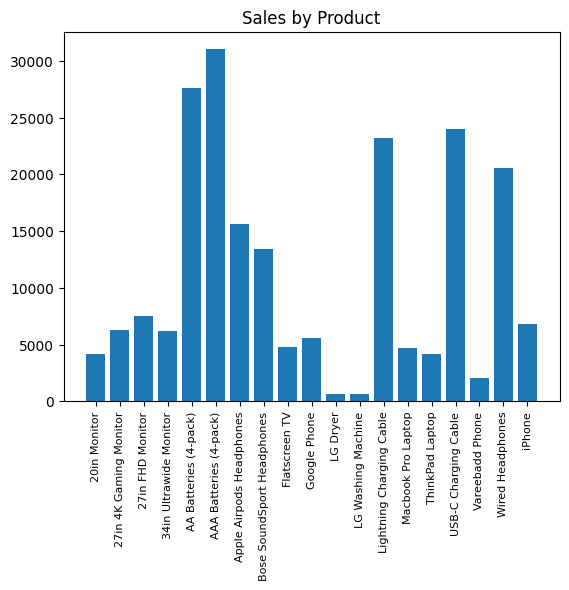

In [378]:
plt.bar(product_sales['Product'], product_sales['Quantity Ordered'])
plt.xticks(rotation=90, size=8)
plt.title('Sales by Product')
plt.show()

Possiamo sovrapporre il costo dei prodotti per avere un'idea del perché della frequenza di acquisto:

/var/folders/dt/xjxw5sfs46vf81751tfk_4bw0000gn/T/ipykernel_61172/1013535126.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(prods, rotation='vertical', size=8)


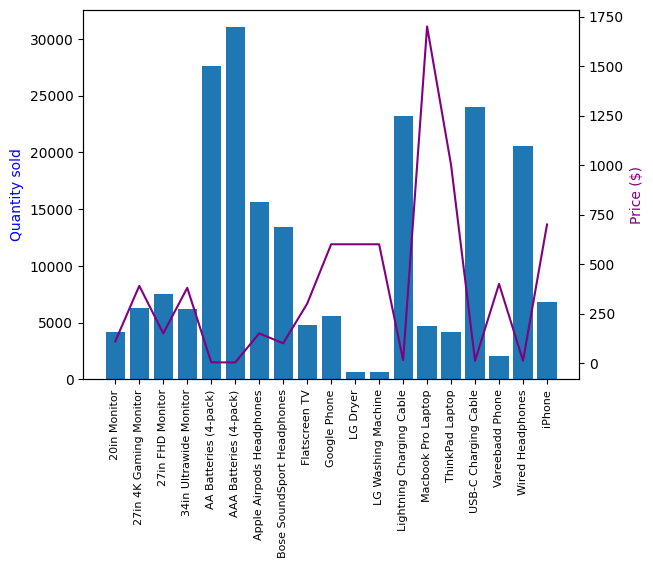

In [38]:
prod_price = all_data.groupby('Product', as_index=False)['Price Each'].min()
prods = prod_price['Product']
prices = prod_price['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prods, product_sales['Quantity Ordered'])
ax2.plot(prods, prices, 'purple')

ax1.set_ylabel('Quantity sold', color='b')
ax2.set_ylabel('Price ($)', color='purple')
ax1.set_xticklabels(prods, rotation='vertical', size=8)
plt.show()
